In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/Explainable_Wound_Classification/'

Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np
import os
import glob
from google.colab.patches import cv2_imshow

In [3]:
#read all images and image names
images, image_names = [], []
for image in glob.glob(root_path + 'Cropped images/*.png'):
  images.append(cv2.imread(image))
  image_names.append(image.split('/')[-1])

images, image_names = np.array(images), np.array(image_names)
print(images.shape)
print(image_names.shape)

(255, 352, 352, 3)
(255,)


Day 0_A8-5-L.png


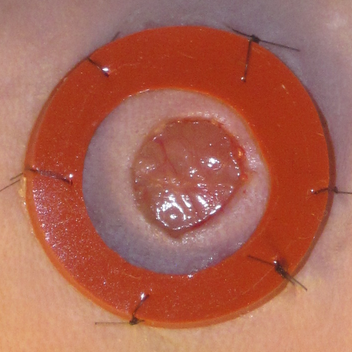

In [4]:
#test image
print(image_names[0])
cv2_imshow(images[0])

Day 9_Y8-4-R.png


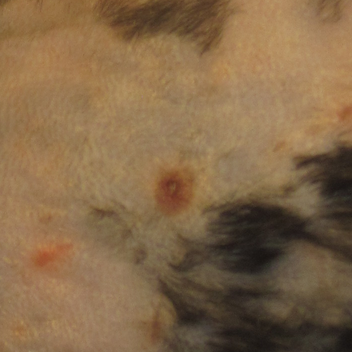

In [5]:
print(image_names[244])
cv2_imshow(images[244])

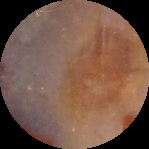

In [6]:
#test cropping
def crop_image(img):
    crop_radius = 75
    mask = np.zeros(images[0].shape, dtype=np.uint8)
    center = (mask.shape[0] // 2, mask.shape[1] // 2)
    mask = cv2.circle(mask, center, crop_radius, (255, 255, 255), -1)

    img = cv2.bitwise_and(img, mask)

    border = (img.shape[0] - (2 * crop_radius)) // 2 + 1
    img = img[border:border - 1 + 2 * crop_radius, border:border - 1 + 2 * crop_radius]

    return img

cv2_imshow(crop_image(cv2.imread(root_path + 'Cropped images/Day 8_A8-5-L.png')))

In [7]:
os.makedirs(root_path + 'Circle_Cropped_images', exist_ok=True)

In [8]:
#re-crop all the images, save them to a new directory and print all images cropped and uncropped for examination
for i in range(images.shape[0]):
    cropped_image = crop_image(images[i])
    print(image_names[i])
    cv2_imshow(images[i])
    cv2_imshow(cropped_image)
    print('\n\n')
    cv2.imwrite(root_path + 'Circle_Cropped_images/' + image_names[i], cropped_image)

Output hidden; open in https://colab.research.google.com to view.